In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('labfiles/deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from labfiles.lab_utils_common import dlc
from labfiles.lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit


(200, 2) (200, 1)


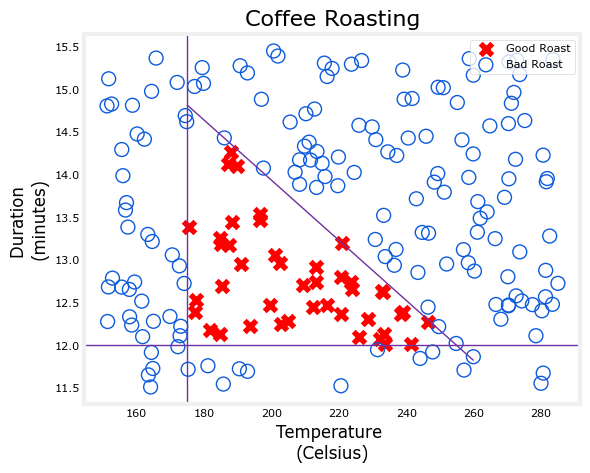

In [2]:
# loading and plotting dat
X,Y = load_coffee_data()
print(X.shape, Y.shape)
plt_roast(X,Y)

In [3]:
# normalizing the data to for features to have similar range, using tensorflow

print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1) # its not a real layer in the model
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

# now we will tile/copy our data to increase the training set size and reduce the no. of epochs
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70
(200000, 2) (200000, 1)


In [4]:
# building a neural network model
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

model.summary()

# verifying the parameter count
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
L1 params =  9 , L2 params =  4


In [5]:
# getting the weights 
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.6  -0.38 -0.11]
 [-0.24  0.13  0.93]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.15]
 [-0.57]
 [-1.22]] 
b2(1,): [0.]


In [6]:
# compiling and training th emodel
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.1704
Epoch 2/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.1159
Epoch 3/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0400
Epoch 4/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0158
Epoch 5/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0103
Epoch 6/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0073
Epoch 7/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0052
Epoch 8/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0037
Epoch 9/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0027
Epoch 10/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0020


In [7]:
# fitted weights
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ -0.12 -11.02  14.3 ]
 [ -8.95  -0.25  11.85]] 
b1: [-11.21 -12.01   1.76]
W2:
 [[-45.81]
 [-50.22]
 [-42.98]] 
b2: [26.2]


In [8]:
# printing the predictions
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

# converting the probablities to decision
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

1/1 [==============================] - 0s 114ms/step
predictions = 
 [[9.89e-01]
 [5.06e-08]]
decisions = 
[[1.]
 [0.]]


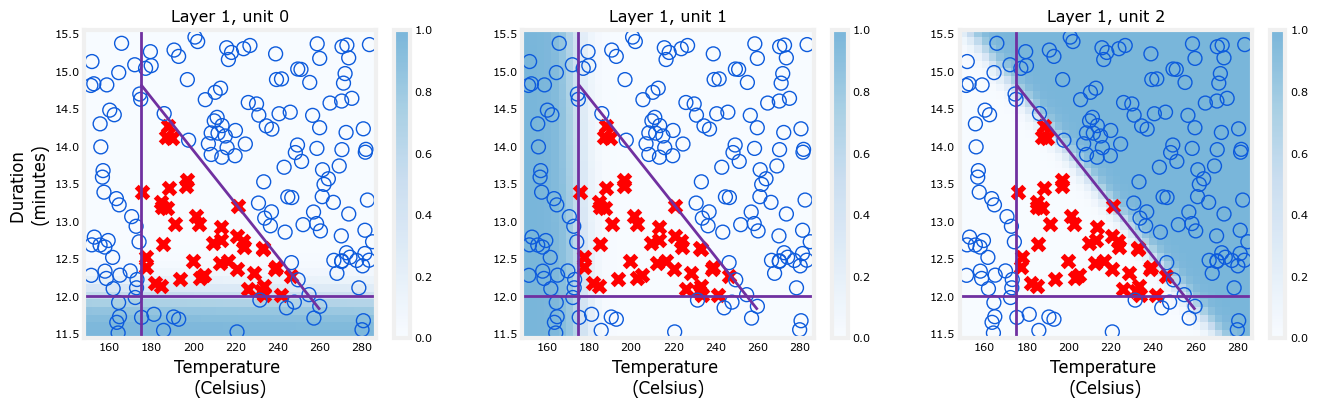

In [9]:
# plotting extracted features by each unit
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)